In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
temperatures = pd.read_csv('/Users/xingobar/Downloads/GlobalLandTemperatures/GlobalTemperatures.csv')
city = pd.read_csv('/Users/xingobar/Downloads/GlobalLandTemperatures/GlobalLandTemperaturesByCity.csv')
country = pd.read_csv('/Users/xingobar/Downloads/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')

In [5]:
country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [6]:
temperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
global_tempature = temperatures[['dt','LandAverageTemperature']]

global_tempature['dt'] = pd.to_datetime(global_tempature['dt'])
global_tempature['year'] = global_tempature['dt'].map(lambda x:x.year)
global_tempature['month'] = global_tempature['dt'].map(lambda x:x.month)

min_year = global_tempature['year'].min()
max_year = global_tempature['year'].max()
year_range = range(min_year,max_year+1)


## convert month to season 
def season(month):
    if month >=3 and month <=5:
        return 'spring'
    elif month >=6 and month <=8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    

global_tempature['season'] = global_tempature['month'].apply(season)
spring = []
summer = []
autumn = []
winter = []

for year in year_range:
    
    curr_year = global_tempature[global_tempature['year'] == year]
    spring.append(curr_year[curr_year['season'] == 'spring']['LandAverageTemperature'].mean())
    summer.append(curr_year[curr_year['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn.append(curr_year[curr_year['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter.append(curr_year[curr_year['season'] == 'winter']['LandAverageTemperature'].mean())

    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

# The mean of global temperature

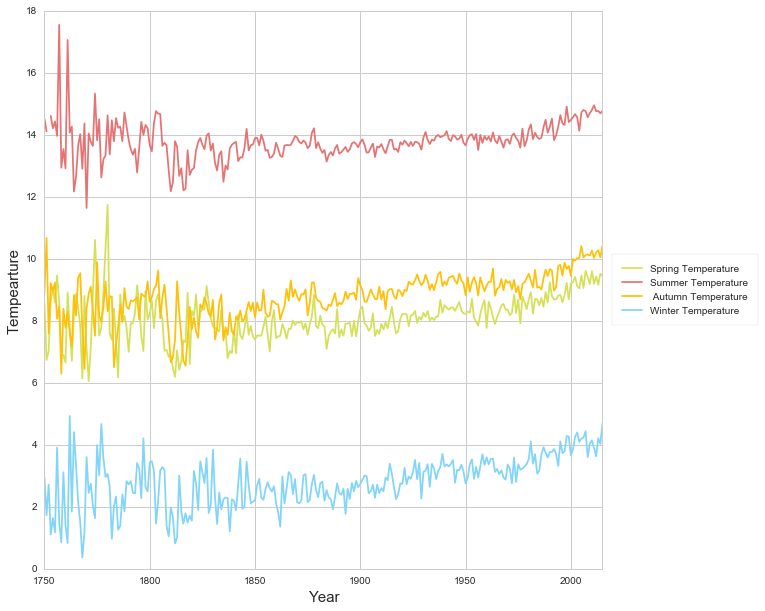

In [8]:
sns.set_style("whitegrid")
sns.set_color_codes('pastel')

fig,ax = plt.subplots(figsize=(10,10))

plt.plot(year_range,spring,label='Spring Temperature',color = '#d4e157')
plt.plot(year_range,summer,label='Summer Temperature',color='#e57373')
plt.plot(year_range,autumn,label =' Autumn Temperature',color = '#ffc107')
plt.plot(year_range,winter,label='Winter Temperature',color = '#81d4fa')

plt.xlim(min_year,max_year)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Tempearture',fontsize=15)
#plt.grid('off')
## frameon : display the frame 
legend = plt.legend(loc='center left',bbox_to_anchor  =(1,0.5),frameon=True,borderpad=1,borderaxespad=1)



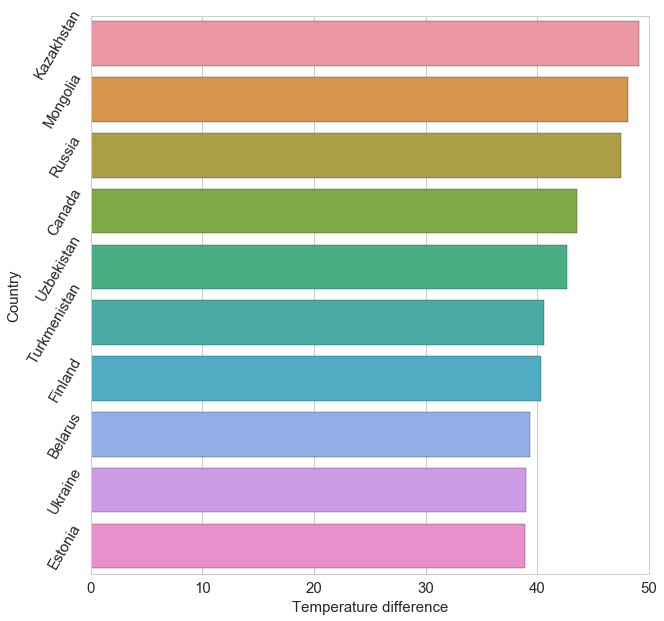

In [9]:
country_names = country['Country'].unique()
max_min = []


for name in country_names:
    
    current_temperature = country[country['Country'] == name]['AverageTemperature']
    max_min.append((current_temperature.max(),current_temperature.min()))

## removing nan
cleaning_max_min = []
cleaning_country = []
for i in xrange(len(max_min)):
    if not np.isnan(max_min[i]).any():
        cleaning_max_min.append(max_min[i])
        cleaning_country.append(country_names[i])

        
diff = []
for i in cleaning_max_min:
    diff.append(i[0] - i[1]) ## max - min = difference

diff,cleaning_country = [list(x) for x in zip(*sorted(zip(diff,cleaning_country),key = lambda i:i[0],reverse=True))]

fig,ax = plt.subplots(figsize=(10,10))

sns.barplot(x = diff[:10] , y = cleaning_country[:10] , ax =ax , palette=sns.set_palette('PuBu'))
text = ax.set(ylabel='Country',xlabel='Temperature difference')
plt.setp(ax.get_yticklabels(),fontsize=15,rotation=60)
plt.setp(ax.get_xticklabels(),fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.xlabel('Temperature difference',fontsize=15)

In [10]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt

In [11]:
Taiwan = city[city['Country'] =='Taiwan']
Taiwan.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1611881,1841-01-01,13.108,2.519,Chungho,Taiwan,24.92N,120.59E
1611882,1841-02-01,13.234,1.908,Chungho,Taiwan,24.92N,120.59E
1611883,1841-03-01,14.386,2.383,Chungho,Taiwan,24.92N,120.59E
1611884,1841-04-01,18.287,2.057,Chungho,Taiwan,24.92N,120.59E
1611885,1841-05-01,22.627,1.423,Chungho,Taiwan,24.92N,120.59E


# Taiwan Temperature

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

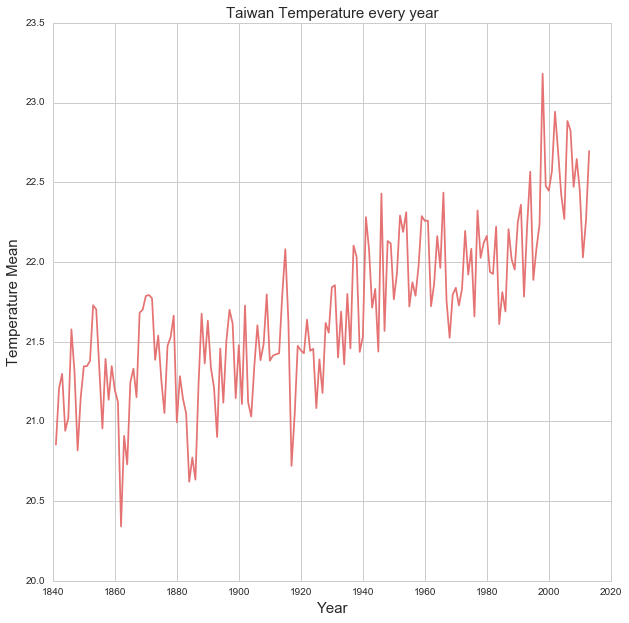

In [76]:
Taiwan['dt'] = pd.to_datetime(Taiwan['dt'])
Taiwan['year'] = Taiwan['dt'].map(lambda x:x.year)
Taiwan['month'] = Taiwan['dt'].map(lambda x:x.month)

taiwan_min_year = Taiwan['year'].min()
taiwan_max_year = Taiwan['year'].max()
taiwan_year_range = range(taiwan_min_year,taiwan_max_year+1)

fig,ax = plt.subplots(figsize=(10,10))
taiwan_mean_temp = []
for year in taiwan_year_range:
    
    taiwan_mean_temp.append(Taiwan[Taiwan['year'] == year]['AverageTemperature'].mean())

plt.title('Taiwan Temperature every year',fontsize=15)
plt.plot(taiwan_year_range,taiwan_mean_temp,color='#e57373')
plt.ylabel('Temperature Mean',fontsize=15)
plt.xlabel('Year',fontsize=15)

# The mean temperature of Taiwan

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


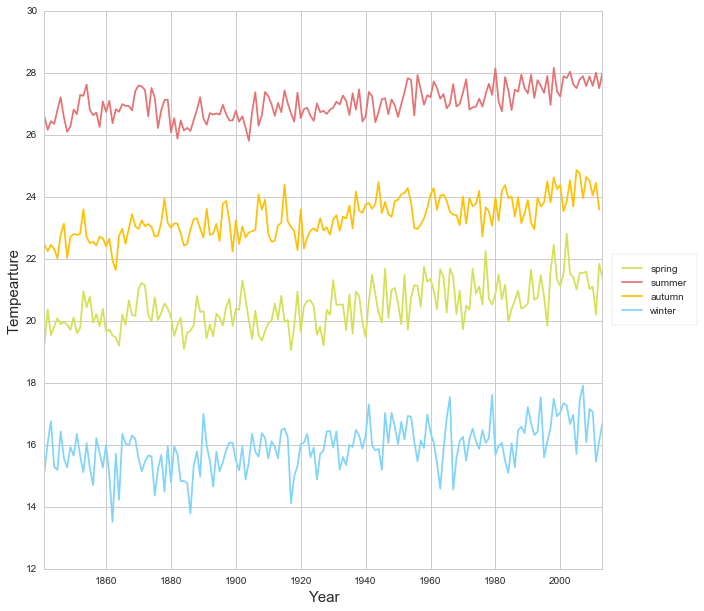

In [79]:
Taiwan['season'] = Taiwan['month'].apply(season)
taiwan_spring = []
taiwan_summer = []
taiwan_autumn = []
taiwan_winter  = []

for year in taiwan_year_range:
    
    curr_temp = Taiwan[Taiwan['year'] == year]
    taiwan_spring.append(curr_temp[curr_temp['season']  == 'spring']['AverageTemperature'].mean())
    taiwan_summer.append(curr_temp[curr_temp['season'] == 'summer']['AverageTemperature'].mean())
    taiwan_autumn.append(curr_temp[curr_temp['season'] == 'autumn']['AverageTemperature'].mean())
    taiwan_winter.append(curr_temp[curr_temp['season'] == 'winter']['AverageTemperature'].mean())

fig,ax = plt.subplots(figsize=(10,10))
plt.plot(taiwan_year_range,taiwan_spring,label='spring',color = '#d4e157')
plt.plot(taiwan_year_range,taiwan_summer,label='summer',color='#e57373')
plt.plot(taiwan_year_range,taiwan_autumn,label='autumn',color = '#ffc107')
plt.plot(taiwan_year_range,taiwan_winter,label='winter',color = '#81d4fa')


plt.xlim(taiwan_min_year,taiwan_max_year)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Tempearture',fontsize=15)
#plt.grid('off')
## frameon : display the frame 
legend = plt.legend(loc='center left',bbox_to_anchor  =(1,0.5),frameon=True,borderpad=1,borderaxespad=1)
